In [23]:
##Script to plot PSU output from LabView EGSE
# 19/09/2018
# Barry Whiteside - UCL

# First paste location of files to plot here
top_dir = r'C:\WDir\PanCam EGSE\Logs\FS\20190823_074351_ThermFFT_07_01'

filt_dir = "\**\*PSU*.txt"
directory = top_dir+filt_dir

# This finds all the PSU files within the directories
import glob
HKs = glob.glob(directory,recursive=True)
print(str(len(HKs))+ " Files Found")

2 Files Found


In [24]:
##Next iterate through data
#Import useful modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read CSV files
df = pd.DataFrame()
hdr = ['Date Time', 'Blank', 'Voltage', 'Current', 'Power', 'Htr. Voltage', 'Htr. Current']
hdr_types = {'Date Time':object}
hdr_types.setdefault("list", 'float64')

for file in HKs:
    dt = pd.read_csv(file, sep='\t', names=hdr, skiprows=1, dtype=hdr_types)
    if dt.size == 0: continue # Some HK is often empty so this skips the file if no lines are found. 
    dt['DT'] = pd.to_datetime(dt['Date Time'], format='%d/%m/%Y %H:%M:%S.%f')
    df = df.append(dt, ignore_index = True)

<IPython.core.display.Javascript object>


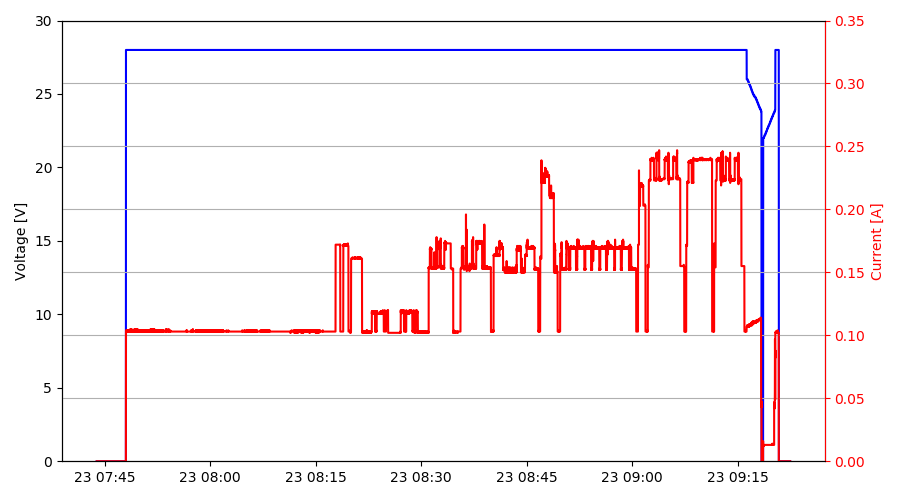

In [25]:
%matplotlib notebook
plt.close("all") #Just to clear memory
#Start plot
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
p1 = df['DT']

f = plt.figure()


ax1=f.add_subplot(1,1,1)
ax2 = ax1.twinx()
ax1.plot(df['DT'], df['Voltage'], 'b-', label='Voltage')
ax1.set_ylabel('Voltage [V]')
ax1.set_ylim(0,30.0)

# ax2.plot(p1, df['Power'], 'r-', label='Power')
# ax2.set_ylabel('Power [W]')
# ax2.set_ylim(0,10)
# ax2.spines['right'].set_color('red')
# ax2.tick_params(axis='y', colors='red')
# ax2.yaxis.label.set_color('red')
# ax2.grid(True)

ax2.plot(p1, df['Current'], 'r-', label='Current')
ax2.set_ylabel('Current [A]')
ax2.set_ylim(0,0.35)
ax2.spines['right'].set_color('red')
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.label.set_color('red')
ax2.grid(True)

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%H:%M')
#ax1.xaxis.set_major_formatter(myFmt)

#Display Plot
f.set_figheight(8)
f.set_figwidth(15)
f.tight_layout()
f.savefig(top_dir+"\PowerSupply.png")

f.set_figheight(5)
f.set_figwidth(9)
f.tight_layout()
f.show()